In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import gaussian_kde

In [2]:
daylight_result = pd.read_csv("analysis_data\\daylight.csv")
daylight_result['condition'] = ['daylight'] * daylight_result.shape[0]
daylight_result.head()

,index,Accuracy,Precision,DiceSimilarityCoefficient,IntersectionOverUnion,HausdorffDistance,TruePositive,TrueNegative,FalsePositive,FalseNegative,AUC,TruePositive_nor,TrueNegative_nor,FalsePositive_nor,FalseNegative_nor,condition
0,0,0.989566,0.541814,0.604865,0.433553,7.141428,1840,226156,1556,848,0.838845,0.799,98.158,0.675,0.368,daylight
1,1,0.985030,0.717005,0.769714,0.625638,10.295630,5764,221187,2275,1174,0.910303,2.502,96.001,0.987,0.510,daylight
2,2,0.974905,0.823708,0.837675,0.720690,9.273618,14919,209699,3193,2589,0.918563,6.475,91.015,1.386,1.124,daylight
3,3,0.964280,0.855117,0.854573,0.746074,7.937254,24181,197989,4097,4133,0.916878,10.495,85.933,1.778,1.794,daylight
4,4,0.984410,0.766857,0.798293,0.664299,5.916080,7108,219700,2161,1431,0.911338,3.085,95.356,0.938,0.621,daylight


In [3]:
daylight_result.describe()

,index,Accuracy,Precision,DiceSimilarityCoefficient,IntersectionOverUnion,HausdorffDistance,TruePositive,TrueNegative,FalsePositive,FalseNegative,AUC,TruePositive_nor,TrueNegative_nor,FalsePositive_nor,FalseNegative_nor
count,59975.000000,59975.000000,59975.000000,59975.000000,59975.000000,59975.000000,59975.000000,59975.000000,59975.000000,59975.000000,59975.000000,59975.000000,59975.000000,59975.000000,59975.000000
mean,30000.380575,0.977492,0.804417,0.789605,0.657300,8.371257,10508.413439,214705.798766,2421.317349,2764.470446,0.886263,4.560946,93.188284,1.050922,1.199860
std,17324.208358,0.009523,0.087209,0.082924,0.094574,2.252132,4757.208454,6494.272313,1240.028399,1456.261494,0.046246,2.064762,2.818693,0.538206,0.632057
min,0.000000,0.890946,0.000000,0.000000,0.000000,0.000000,0.000000,162695.000000,0.000000,0.000000,0.493644,0.000000,70.614000,0.000000,0.000000
25%,14993.500000,0.972296,0.792282,0.772090,0.628413,6.708204,7316.000000,210967.000000,1616.000000,1820.000000,0.876653,3.175000,91.566000,0.701000,0.790000
50%,30012.000000,0.978676,0.827382,0.810827,0.681655,8.185353,10134.000000,215230.000000,2215.000000,2476.000000,0.900224,4.398000,93.416000,0.961000,1.075000
75%,45005.500000,0.983974,0.847477,0.833502,0.714362,9.746794,13189.500000,219056.500000,2986.000000,3379.000000,0.912265,5.724500,95.076500,1.296000,1.467000
max,59999.000000,1.000000,1.000000,1.000000,0.900706,24.637370,52655.000000,230400.000000,16329.000000,24147.000000,1.000000,22.854000,100.000000,7.087000,10.480000


In [4]:
night_result = pd.read_csv("analysis_data\\night.csv")
night_result['condition'] = ['night'] * night_result.shape[0]
night_result.head()

,index,Accuracy,Precision,DiceSimilarityCoefficient,IntersectionOverUnion,HausdorffDistance,TruePositive,TrueNegative,FalsePositive,FalseNegative,AUC,TruePositive_nor,TrueNegative_nor,FalsePositive_nor,FalseNegative_nor,condition
0,0,0.990069,0.834552,0.838441,0.721824,4.690416,5937,222175,1177,1111,0.918548,2.577,96.430,0.511,0.482,night
1,1,0.981319,0.775302,0.820142,0.695119,8.246211,9813,216283,2844,1460,0.928754,4.259,93.873,1.234,0.634,night
2,2,0.959579,0.818630,0.835083,0.716861,11.000000,23579,197508,5224,4089,0.913222,10.234,85.724,2.267,1.775,night
3,3,0.971233,0.802935,0.824721,0.701724,8.602325,15593,208179,3827,2801,0.914835,6.768,90.355,1.661,1.216,night
4,4,0.959366,0.854109,0.771067,0.627428,11.704700,15766,205272,2693,6669,0.844896,6.843,89.094,1.169,2.895,night


In [5]:
night_result.head()

,index,Accuracy,Precision,DiceSimilarityCoefficient,IntersectionOverUnion,HausdorffDistance,TruePositive,TrueNegative,FalsePositive,FalseNegative,AUC,TruePositive_nor,TrueNegative_nor,FalsePositive_nor,FalseNegative_nor,condition
0,0,0.990069,0.834552,0.838441,0.721824,4.690416,5937,222175,1177,1111,0.918548,2.577,96.430,0.511,0.482,night
1,1,0.981319,0.775302,0.820142,0.695119,8.246211,9813,216283,2844,1460,0.928754,4.259,93.873,1.234,0.634,night
2,2,0.959579,0.818630,0.835083,0.716861,11.000000,23579,197508,5224,4089,0.913222,10.234,85.724,2.267,1.775,night
3,3,0.971233,0.802935,0.824721,0.701724,8.602325,15593,208179,3827,2801,0.914835,6.768,90.355,1.661,1.216,night
4,4,0.959366,0.854109,0.771067,0.627428,11.704700,15766,205272,2693,6669,0.844896,6.843,89.094,1.169,2.895,night


In [6]:
result_data = pd.concat([daylight_result, night_result], ignore_index=True)
result_data

,index,Accuracy,Precision,DiceSimilarityCoefficient,IntersectionOverUnion,HausdorffDistance,TruePositive,TrueNegative,FalsePositive,FalseNegative,AUC,TruePositive_nor,TrueNegative_nor,FalsePositive_nor,FalseNegative_nor,condition
0,0,0.989566,0.541814,0.604865,0.433553,7.141428,1840,226156,1556,848,0.838845,0.799,98.158,0.675,0.368,daylight
1,1,0.985030,0.717005,0.769714,0.625638,10.295630,5764,221187,2275,1174,0.910303,2.502,96.001,0.987,0.510,daylight
2,2,0.974905,0.823708,0.837675,0.720690,9.273618,14919,209699,3193,2589,0.918563,6.475,91.015,1.386,1.124,daylight
3,3,0.964280,0.855117,0.854573,0.746074,7.937254,24181,197989,4097,4133,0.916878,10.495,85.933,1.778,1.794,daylight
4,4,0.984410,0.766857,0.798293,0.664299,5.916080,7108,219700,2161,1431,0.911338,3.085,95.356,0.938,0.621,daylight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85070,25095,0.975221,0.685516,0.731959,0.577236,7.071068,7795,216896,3576,2133,0.884467,3.383,94.139,1.552,0.926,night
85071,25096,0.975907,0.758444,0.764838,0.619221,7.416198,9027,215822,2875,2676,0.879097,3.918,93.673,1.248,1.161,night
85072,25097,0.983112,0.789885,0.779359,0.638484,7.681146,6872,219637,1828,2063,0.880428,2.983,95.329,0.793,0.895,night
85073,25098,0.972990,0.844451,0.837413,0.720302,7.348469,16026,208151,2952,3271,0.908254,6.956,90.343,1.281,1.420,night


(0.0, 1800.0)

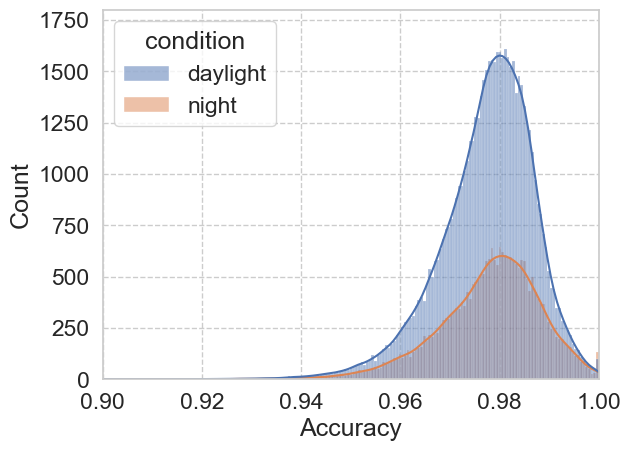

In [7]:
sns.set(font_scale=1.5)
sns.set_style("whitegrid", {'grid.linestyle': '--'})
hist = sns.histplot(data=result_data, x='Accuracy', hue='condition', kde='True')
plt.xlim(0.9, 1.0)
plt.ylim(0, 1800)

In [8]:
# data = result_data[result_data['condition']=='night']['Accuracy'].to_numpy()
data = result_data['Accuracy'].to_numpy()

kde = gaussian_kde(data)
x_grid = np.linspace(data.min(), data.max(), 1000)
kde_values = kde.evaluate(x_grid)
max_density_index = np.argmax(kde_values)
most_common_value = x_grid[max_density_index]

print(f'중앙값: {np.median(data)}, 평균값: {np.mean(data)}, 최빈값: {most_common_value}, 표준편차: {np.std(data)}')

중앙값: 0.978811, 평균값: 0.9776298417278872, 최빈값: 0.98028290990991, 표준편차: 0.009813580017744029


(0.5, 1.0)

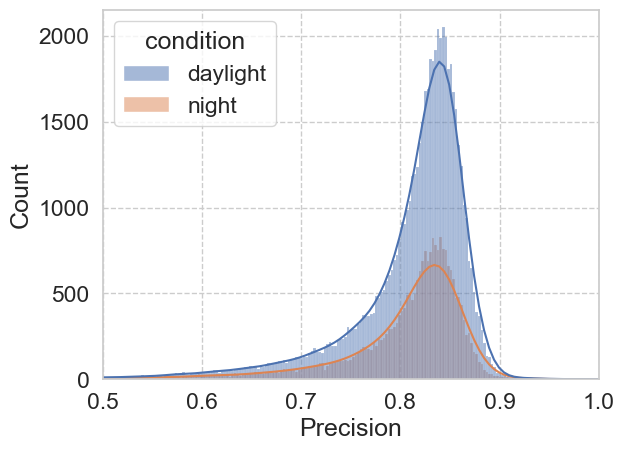

In [9]:
sns.set(font_scale=1.5)
sns.set_style("whitegrid", {'grid.linestyle': '--'})
hist = sns.histplot(data=result_data, x='Precision', hue='condition', kde='True')
plt.xlim(0.5, 1.0)
# plt.ylim(0, 2200)

In [10]:
#data = result_data[result_data['condition']=='daylight']['Precision'].to_numpy()
data = result_data['Precision'].to_numpy()

kde = gaussian_kde(data)
x_grid = np.linspace(data.min(), data.max(), 1000)
kde_values = kde.evaluate(x_grid)
max_density_index = np.argmax(kde_values)
most_common_value = x_grid[max_density_index]

print(f'중앙값: {np.median(data)}, 평균값: {np.mean(data)}, 최빈값: {most_common_value}, 표준편차: {np.std(data)}')

중앙값: 0.825763, 평균값: 0.8003515955451073, 최빈값: 0.8388388388388388, 표준편차: 0.09660120306959859


(0.3, 1.0)

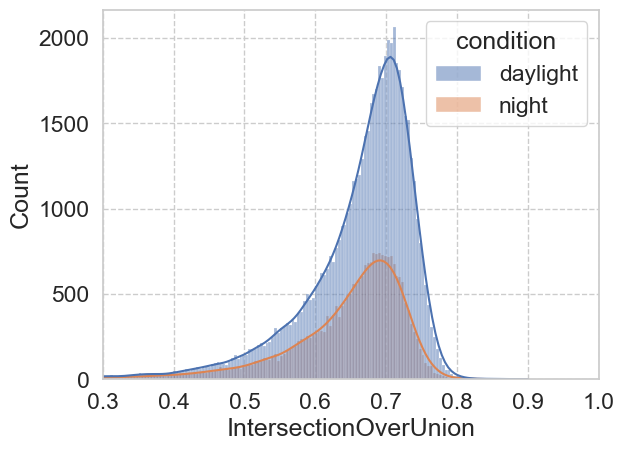

In [11]:
sns.set(font_scale=1.5)
sns.set_style("whitegrid", {'grid.linestyle': '--'})
hist = sns.histplot(data=result_data, x='IntersectionOverUnion', hue='condition', kde='True')
plt.xlim(0.3, 1.0)
# plt.ylim(0, 2200)

In [12]:
data = result_data[result_data['condition']=='night']['IntersectionOverUnion'].to_numpy()
#data = result_data['IntersectionOverUnion'].to_numpy()

kde = gaussian_kde(data)
x_grid = np.linspace(data.min(), data.max(), 1000)
kde_values = kde.evaluate(x_grid)
max_density_index = np.argmax(kde_values)
most_common_value = x_grid[max_density_index]

print(f'중앙값: {np.median(data)}, 평균값: {np.mean(data)}, 최빈값: {most_common_value}, 표준편차: {np.std(data)}')

중앙값: 0.6648350000000001, 평균값: 0.6336110737848605, 최빈값: 0.6907715355355355, 표준편차: 0.11570158336938127


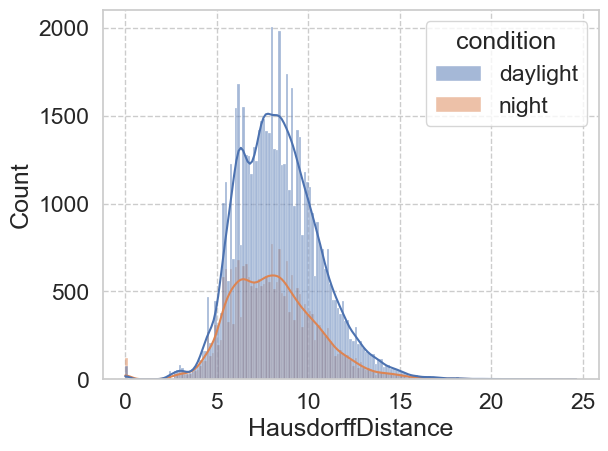

In [13]:
sns.set(font_scale=1.5)
sns.set_style("whitegrid", {'grid.linestyle': '--'})
hist = sns.histplot(data=result_data, x='HausdorffDistance', hue='condition', kde='True')
#plt.xlim(0.3, 1.0)
# plt.ylim(0, 2200)

In [14]:
#data = result_data[result_data['condition']=='daylight']['HausdorffDistance'].to_numpy()
data = result_data['HausdorffDistance'].to_numpy()

kde = gaussian_kde(data)
x_grid = np.linspace(data.min(), data.max(), 1000)
kde_values = kde.evaluate(x_grid)
max_density_index = np.argmax(kde_values)
most_common_value = x_grid[max_density_index]

print(f'중앙값: {np.median(data)}, 평균값: {np.mean(data)}, 최빈값: {most_common_value}, 표준편차: {np.std(data)}')

중앙값: 8.124038, 평균값: 8.28996816219806, 최빈값: 7.793202122122123, 표준편차: 2.3018068594209757


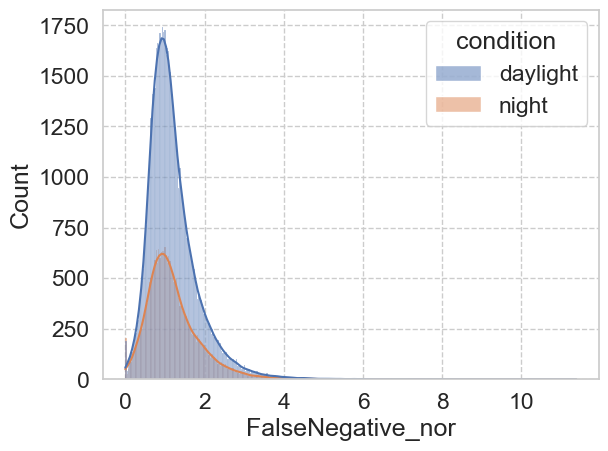

In [18]:
sns.set(font_scale=1.5)
sns.set_style("whitegrid", {'grid.linestyle': '--'})
hist = sns.histplot(data=result_data, x='FalseNegative_nor', hue='condition', kde='True')
#plt.xlim(0.3, 1.0)
# plt.ylim(0, 2200)

In [31]:
#data = result_data[result_data['condition']=='night']['TruePositive_nor'].to_numpy()
data = result_data['FalseNegative_nor'].to_numpy()

kde = gaussian_kde(data)
x_grid = np.linspace(data.min(), data.max(), 1000)
kde_values = kde.evaluate(x_grid)
max_density_index = np.argmax(kde_values)
most_common_value = x_grid[max_density_index]

print(f'중앙값: {np.median(data)}, 평균값: {np.mean(data)}, 최빈값: {most_common_value}, 표준편차: {np.std(data)}')

중앙값: 1.074, 평균값: 1.1997911960035264, 최빈값: 0.9341761761761762, 표준편차: 0.6487443476771342
